# 1º Período ✅

# Introdução

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [77]:
datum1 = "/content/heart.csv"  # lendo um arquivo csv
df1 = pd.read_csv(datum1) # data frame com dados originais
df1_norm = pd.read_csv(datum1) # data frame com dados convenientes normalizados

idade / sexo / tipo_dor_peito / pressao_sanguinea_repouso / colest_serico / acucar_sangue_jejum / eletrocard_rep / freqcard_max / angina_exerc / old_peak / inclinacao_ST_pico / alvo 

In [78]:
df1 = df1.rename_axis('Person', axis=1) # nomeando a coluna de índices
df1.head(5) # examinando as 5 primeiras linhas do dataset

Person,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [79]:
df1.tail(5) # examinando as 5 últimas linhas do dataset

Person,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


No handles with labels found to put in legend.


Text(0.5, 1.0, 'All data mixed')

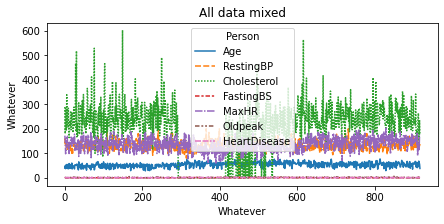

In [80]:
plt.figure(figsize = (7,3)) # ajustando o tamanho da figura do gráfico
plt.xlabel("Whatever") # nomeando eixo x
plt.ylabel("Whatever") # nomeando eixo y
plt.legend()  # aparecer a leganda 
p = sns.lineplot(data = df1)  # apenas verificando como são todos os dados numéricos juntos
p.set_title("All data mixed") # título

Como é possível ver, os dados numéricos juntos em um gráfico significam absolutamente nada. Análises precisam ser feitas para poder concluir algo desse Dataset. Além disso, o Dataset possui colunas com valores não numéricos também, o que torna a análise não puramente numérica, mas sim com uma grau de complexidade maior.

# Data Cleaning - Verificando valores faltantes e dados inconsitentes / Normalização do Dataset

In [81]:
df1.isnull().sum() # verificando se há valores faltantes

Person
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Não há valores faltantes no DATASET. Agora, é preciso fazer uma análise minuciosa de cada coluna e conhecer o significado dos dados de cada coluna para aplicar técnicas de Data Cleaning no Dataset. 
Após tal análise intuitiva, existem técnicas e aplicação de cada uma delas depende da situação.

In [82]:
# verificar se há valores de 'Age' que não fazem sentido
df1.groupby('Age').Age.count()  

Age
28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: Age, dtype: int64

Não há valores de 'Age' == 0 nem que não fazem sentido.

In [83]:
# verificar se há valores de 'Sex' que não fazem sentido
df1.groupby('Sex').Sex.count()

Sex
F    193
M    725
Name: Sex, dtype: int64

Não há valores de 'Sex' que não fazem sentido.

In [84]:
# verificar se há valores de 'ChestPainType' que não fazem sentido
df1.groupby('ChestPainType').ChestPainType.count()

ChestPainType
ASY    496
ATA    173
NAP    203
TA      46
Name: ChestPainType, dtype: int64

Não há valores de 'ChestPainType' que não fazem sentido. 

In [85]:
# verificar se há valores de 'RestingBP' que não fazem sentido
df1_rbp = df1.groupby('RestingBP').RestingBP.count()
df1_rbp

RestingBP
0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: RestingBP, Length: 67, dtype: int64

Há um valor de 'RestingBP' == 0, o que não faz sentido, pois ter uma pressão em repouso nula faria com que o sangue não estivesse circulando. O dado ou não foi coletado ou não está presente por algum motivo. Então, é preciso mudar esse valor para que não prejudique a análise dos dados.

In [86]:
media_rbp = df1['RestingBP'].mean()

# substituindo o valor de 'RestingBP' == 0 pela média da coluna 'RestingBP'
# é um método válido para substituir com uma variável categórica
df1['RestingBP'].replace(0, media_rbp, inplace = True)

# alterando o data frame que será normalizado futuramente também 
df1_norm['RestingBP'].replace(0, media_rbp, inplace = True)

A substituição dos valores de 'RestingBP' == 0 pela média da coluna 'RestingBP' é uma boa forma de diminuir o desvio que a amostra nula causaria. Não há muitos valores repetidos, então a moda não seria uma boa opção, e são muitos valores únicos para substituir pela mediana também.

In [87]:
df1_mask_rbp = df1['RestingBP'] == (media_rbp)
filtered_df1_rbp = df1[df1_mask_rbp]
len(filtered_df1_rbp.index) # verificando que todos os 0s foram substituídos --> que é 1

1

In [88]:
# verificar se há valores de 'Cholesterol' == 0, pois não faz sentido  
df1.groupby('Cholesterol').Cholesterol.count()  # contar a qtde de valores de 'Cholesterol' == 0

Cholesterol
0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: Cholesterol, Length: 222, dtype: int64

Há valores de 'Cholesterol' == 0, o que não faz sentido. Até uma pessoa muito saudável possui um relativo grau de gordura no sangue. O dado ou não foi coletado ou não está presente por algum motivo. Então, é preciso mudar esse valor para que não prejudique a análise dos dados.

In [89]:
media_colesterol = df1['Cholesterol'].mean()

# substituindo os valores de 'Cholesterol' == 0 pela média da coluna 'Cholesterol'
# é um método válido para substituir com uma variável categórica
df1['Cholesterol'].replace(0, media_colesterol, inplace = True)

# alterando o data frame que será normalizado futuramente também 
df1_norm['Cholesterol'].replace(0, media_colesterol, inplace = True)

A substituição dos valores de 'Cholesterol' == 0 pela média da coluna 'Cholesterol' é uma boa forma de diminuir o desvio que a amostra nula causaria. Não há muitos valores repetidos, então a moda não seria uma boa opção, e são muitos valores únicos para substituir pela mediana também. 

In [90]:
df1_mask = df1.Cholesterol == media_colesterol
filtered_df1 = df1[df1_mask]
len(filtered_df1.index) # verificando que todos os 0s foram substituídos --> que são 171

172

In [91]:
# verificar se há valores de 'FastingBS' que não fazem sentido
df1.groupby('FastingBS').FastingBS.count()

FastingBS
0    704
1    214
Name: FastingBS, dtype: int64

Valores de 'FastingBS' == 0 e == 1 não fazem sentido, pois a taxa de açúcar no sangue em jejum não é uma variável booleana. Deste modo, é necessário fazer alterações para que tais valores não compromentam a análise de dados.

In [92]:
media_fbs = df1['FastingBS'].mean()

# substituindo os valores de 'FastingBS' == 0 e == 1 pela média da coluna 'Cholesterol'
# é um método válido para substituir com uma variável categórica
df1['FastingBS'].replace(0, media_fbs, inplace = True)

# alterando o data frame que será normalizado futuramente também 
df1_norm['FastingBS'].replace(0, media_fbs, inplace = True)

In [93]:
df1['FastingBS'].replace(1, media_fbs, inplace = True)

# alterando o data frame que será normalizado futuramente também 
df1_norm['FastingBS'].replace(1, media_fbs, inplace = True)

Ter a maioria dos valores nulos e muitos valores == 1 faz com que o desvio padrão seja muito baixo, o que significa que a taxa de dispersão é baixa e os valores tem um tendência de serem homogêneos. Assim sendo, substituir pela média simples não prejudicaria significativamente a análise. 


In [94]:
df1_mask_fbs = df1['FastingBS'] == (media_fbs)
filtered_df1_fbs = df1[df1_mask_fbs]
len(filtered_df1_fbs.index) # verificando que todos os 0s e 1s foram substituídos --> que são 917 

918

In [95]:
df1

Person,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0.233115,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0.233115,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0.233115,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0.233115,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0.233115,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,264.0,0.233115,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144.0,193.0,0.233115,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130.0,131.0,0.233115,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130.0,236.0,0.233115,LVH,174,N,0.0,Flat,1


In [96]:
# verificando se há valores que não fazem sentido em 'RestingEC'
df1.groupby('RestingECG').RestingECG.count()

RestingECG
LVH       188
Normal    552
ST        178
Name: RestingECG, dtype: int64

Não há valores que não fazem sentido em 'RestingECG', pois se trata de categorias para a taxa do eletrocardiograma.

In [97]:
# verificando se há valores que não fazem sentido em 'MaxHR'
df1.groupby('MaxHR').MaxHR.count()

MaxHR
60     1
63     1
67     1
69     1
70     1
      ..
190    2
192    1
194    1
195    1
202    1
Name: MaxHR, Length: 119, dtype: int64

Não há valores que não fazem sentido em 'MaxHR', não há absurdos como valores extremamente baixos ou extremamente baixos de frequência cardíaca máxima (maxHR). 

In [98]:
# verificando se há valores que não fazem sentido em 'ExerciseAngina'
df1.groupby('ExerciseAngina').ExerciseAngina.count()

ExerciseAngina
N    547
Y    371
Name: ExerciseAngina, dtype: int64

Não há valores estranhos para 'ExerciseAngina', já que é possível ter essa dor no peito ou não (angina). 

In [99]:
# verificando se há valores que não fazem sentido em 'Oldpeak'
# no âmbito médico, o oldpeak possui um range de aproximadamente [0-6] para valores positivos e negativos

df1.groupby('Oldpeak').Oldpeak.count()

Oldpeak
-2.6      1
-2.0      1
-1.5      1
-1.1      1
-1.0      2
-0.9      1
-0.8      1
-0.7      1
-0.5      2
-0.1      2
 0.0    368
 0.1     14
 0.2     22
 0.3     11
 0.4     11
 0.5     19
 0.6     14
 0.7      7
 0.8     16
 0.9      4
 1.0     86
 1.1      7
 1.2     26
 1.3      7
 1.4     18
 1.5     53
 1.6     16
 1.7      6
 1.8     17
 1.9      7
 2.0     76
 2.1      2
 2.2      5
 2.3      2
 2.4      4
 2.5     16
 2.6      7
 2.8      7
 2.9      1
 3.0     28
 3.1      1
 3.2      2
 3.4      3
 3.5      2
 3.6      4
 3.7      1
 3.8      1
 4.0      8
 4.2      2
 4.4      1
 5.0      1
 5.6      1
 6.2      1
Name: Oldpeak, dtype: int64

Os dados estão no range aproximado de [0-6], que é depressão ST induzida por exercício relativo ao descansar. 

In [100]:
# verificando se há dados que não fazem sentido em 'ST_Slope'
df1.groupby('ST_Slope').ST_Slope.count()

ST_Slope
Down     63
Flat    460
Up      395
Name: ST_Slope, dtype: int64

Não há dados que não fazem sentido em 'ST_Slope. Trata-se de uma variável categórica da inclinação ST do eletrocardiograma (ST é um tipo de inclinação no eletrocardiograma). 
Segue um exemplo: 




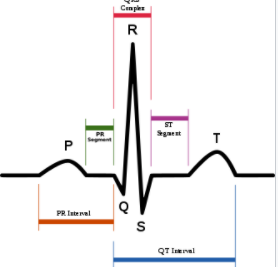

In [101]:
# verificando se há valores que não fazem sentido em 'HeartDisease'
df1.groupby('HeartDisease').HeartDisease.count()

HeartDisease
0    410
1    508
Name: HeartDisease, dtype: int64

Não há variáveis que não fazem sentido em 'HeartDisease'. Trata-se de uma variável booleana que indica 1 para ter uma doença cardíaca e 0 para não ter. 

----------------------------------------------------------------------------------------------------------------------------------------



Todo o Dataset será normalizado a fim de evitar escalas muito diferentes na Data Visualization. De um modo geral, a normalização torna a análise de dados mais precisa e refinada.

É importante mencionar que não é interessante normalizar dados categóricos, a não ser que tais dados estejam estritamente relacionados com distâncias (o que não é o caso desse Dataset). Deste modo, os dados categóricos (nominais, ordinais ou quantitativos) não serão normalizados.

**O df1 não será alterado, mas sim um outro data frame (df1_norm) será gerado para, durante manipulações futuras que não envolvam plotagem de gráficos, que as conclusões sejam mais visuais ao olho humano. Normalizar é importante para que as escalas dos gráficos não fiquem muito estranhas. Porém, para manipulações convencionais, é melhor ver os dados com valores originais para facilitar a visualização.**

Fórmula da normalização min-max: **(df1['column'] - df1['column'].min())/(df1['column'].max() - df1['column'].min())**.

In [102]:
# é melhor não normalizar a coluna 'Age', pois os dados ficam pouco visuais normalizados

# df1_norm['Age'] = ((df1['Age'] - df1['Age'].mean())/df1['Age'].std()).round(2)
# df1_norm.head(5) # verificando se houve a normalização

In [103]:
df1_norm['RestingBP'] = ((df1['RestingBP'] - df1['RestingBP'].min())/(df1['RestingBP'].max() - df1['RestingBP'].min())).round(3)
df1_norm.head(5) # verificando se houve a normalização

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,0.500,289.0,0.233115,Normal,172,N,0.0,Up,0
1,49,F,NAP,0.667,180.0,0.233115,Normal,156,N,1.0,Flat,1
2,37,M,ATA,0.417,283.0,0.233115,ST,98,N,0.0,Up,0
3,48,F,ASY,0.483,214.0,0.233115,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,0.583,195.0,0.233115,Normal,122,N,0.0,Up,0


In [104]:
df1_norm['Cholesterol'] = ((df1['Cholesterol'] - df1['Cholesterol'].min())/(df1['Cholesterol'].max() - df1['Cholesterol'].min())).round(3)
df1_norm.head(5) # verificando se houve a normalização

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,0.500,0.394,0.233115,Normal,172,N,0.0,Up,0
1,49,F,NAP,0.667,0.183,0.233115,Normal,156,N,1.0,Flat,1
2,37,M,ATA,0.417,0.382,0.233115,ST,98,N,0.0,Up,0
3,48,F,ASY,0.483,0.249,0.233115,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,0.583,0.212,0.233115,Normal,122,N,0.0,Up,0


In [105]:
df1_norm['MaxHR'] = ((df1['MaxHR'] - df1['MaxHR'].min())/(df1['MaxHR'].max() - df1['MaxHR'].min())).round(3)
df1_norm.head(5) # verificando se houve a normalização

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,0.500,0.394,0.233115,Normal,0.789,N,0.0,Up,0
1,49,F,NAP,0.667,0.183,0.233115,Normal,0.676,N,1.0,Flat,1
2,37,M,ATA,0.417,0.382,0.233115,ST,0.268,N,0.0,Up,0
3,48,F,ASY,0.483,0.249,0.233115,Normal,0.338,Y,1.5,Flat,1
4,54,M,NAP,0.583,0.212,0.233115,Normal,0.437,N,0.0,Up,0


In [106]:
df1_norm['Oldpeak'] = ((df1['Oldpeak'] - df1['Oldpeak'].min())/(df1['Oldpeak'].max() - df1['Oldpeak'].min())).round(3)
df1_norm.head(5) # verificando se houve a normalização

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,0.500,0.394,0.233115,Normal,0.789,N,0.295,Up,0
1,49,F,NAP,0.667,0.183,0.233115,Normal,0.676,N,0.409,Flat,1
2,37,M,ATA,0.417,0.382,0.233115,ST,0.268,N,0.295,Up,0
3,48,F,ASY,0.483,0.249,0.233115,Normal,0.338,Y,0.466,Flat,1
4,54,M,NAP,0.583,0.212,0.233115,Normal,0.437,N,0.295,Up,0


In [107]:
df1.head(3) # dataframe normalizado

Person,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0.233115,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0.233115,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0.233115,ST,98,N,0.0,Up,0


In [108]:
df1_norm.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,0.500,0.394,0.233115,Normal,0.789,N,0.295,Up,0
1,49,F,NAP,0.667,0.183,0.233115,Normal,0.676,N,0.409,Flat,1
2,37,M,ATA,0.417,0.382,0.233115,ST,0.268,N,0.295,Up,0


# Data Analysis (Pandas e Numpy), Data Visualization (Matplotlib e Seaborn) 

1. Quais os 10 maiores valores de colesterol e a média de idade para esses valores?






In [109]:
age_chol = df1_norm.sort_values(by = 'Cholesterol', ascending = False)  # ordenar a coluna 'Cholesterol' em ordem decrescente
age_chol.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
149,54,M,ASY,0.417,1.000,0.233115,Normal,0.458,Y,0.409,Flat,1
616,67,F,NAP,0.292,0.925,0.233115,LVH,0.704,N,0.477,Flat,0
76,32,M,ASY,0.317,0.857,0.233115,Normal,0.493,N,0.295,Flat,1
30,53,M,NAP,0.542,0.836,0.233115,Normal,0.493,N,0.295,Flat,1
250,44,M,ASY,0.458,0.784,0.233115,Normal,0.528,N,0.295,Flat,1
28,53,F,ATA,0.275,0.739,0.233115,Normal,0.472,N,0.295,Up,0
103,40,M,ASY,0.333,0.736,0.233115,Normal,0.648,Y,0.409,Flat,1
496,58,M,ASY,0.433,0.720,0.233115,Normal,0.063,N,0.409,Down,0
667,65,F,NAP,0.500,0.641,0.233115,LVH,0.683,N,0.386,Up,0
69,44,M,ASY,0.583,0.631,0.233115,Normal,0.775,N,0.295,Up,0


In [110]:
age_chol = pd.DataFrame({'Age': age_chol['Age'], 'Cholesterol': age_chol['Cholesterol']}).reset_index(drop = True)

# o drop = True do reset_index() exclui a coluna original do índices
age_chol_max10 = age_chol.nlargest(10, 'Cholesterol') # filtrando os 10 maiores valores de colesterol
age_chol_max10

,Age,Cholesterol
0,54,1.000
1,67,0.925
2,32,0.857
3,53,0.836
4,44,0.784
5,53,0.739
6,40,0.736
7,58,0.720
8,65,0.641
9,44,0.631


Text(0.5, 1.0, '10 maiores valores de colesterol')

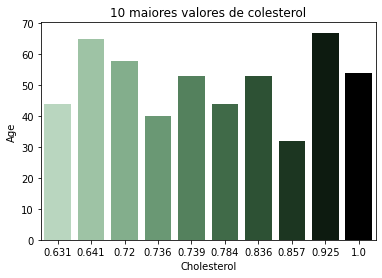

In [111]:
palette = sns.cubehelix_palette(10, start = 2, rot = 0, dark = 0, light = 0.8)

# gráfico de barra com a paleta de cores configurada
u = sns.barplot(x = 'Cholesterol', y = 'Age', data = age_chol_max10, palette = palette)

# título do gráfico
u.set_title('10 maiores valores de colesterol')

Conclui-se que as 10 maiores taxas de colesterol se encontram com pessoas com aproximadamente maiores que 30 anos.

In [112]:
age_chol['Age'].mean() # média da coluna 'Age'

53.510893246187365

E a média de idade para as 10 maiores taxas de colesterol é de **51 anos**.

2. Qual a proporção entre os sexos dos 10 maiores valores de colesterol?


In [113]:
sex_chol = pd.DataFrame({'Sex': df1_norm['Sex'], 'Cholesterol': df1_norm['Cholesterol']}).reset_index(drop = True) # novo data frame sem os índices
sex_chol_max10 = sex_chol.nlargest(10, 'Cholesterol')
sex_chol_max10.groupby('Sex').sum()

,Cholesterol
Sex,
F,2.305
M,5.564


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc216dd5150>],
      dtype=object)

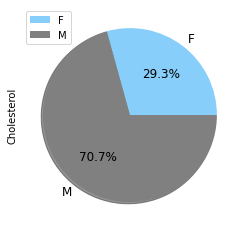

In [114]:
plt_sex = sex_chol_max10.groupby('Sex').sum()
cores=['lightskyblue', 'gray']

# gráfico de pizza personalizado
plt_sex.plot.pie(subplots = True, autopct = '%1.1f%%', shadow = True, legend = True, fontsize = 12, colors = cores)


Entre a soma dos 10 maiores valores de colesterol, a proporção é que ~70% dos valores são de homens e ~30% são de mulheres.

3. Há correlação entre a taxa de colesterol e a frequência cardíaca máxima? 

In [115]:
chol_mhr = pd.DataFrame({'Cholesterol': df1_norm['Cholesterol'], 'MaxHR': df1_norm['MaxHR']}) # novo data frame
chol_mhr

,Cholesterol,MaxHR
0,0.394,0.789
1,0.183,0.676
2,0.382,0.268
3,0.249,0.338
4,0.212,0.437
...,...,...
913,0.346,0.507
914,0.208,0.570
915,0.089,0.387
916,0.292,0.803


In [116]:
# criando matriz de correlação
corr = chol_mhr.corr()
corr

,Cholesterol,MaxHR
Cholesterol,1.000000,0.072451
MaxHR,0.072451,1.000000


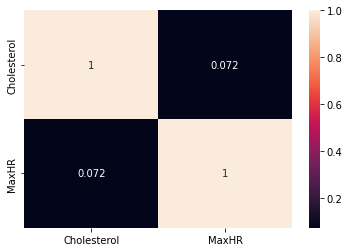

In [117]:
# mapa de calor com matriz de correlação
sns.heatmap(corr, annot = True)

De acordo com a escala de correlação, há uma correlação positiva fraca entre a taxa de colesterol e a frequência cardíaca máxima. 


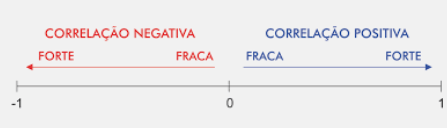

4. Para pessoas com doenças cardíacas, qual o tipo de dor no peito é mais frequente? E qual o menos?

In [118]:
cpt_hd = pd.DataFrame({'ChestPainType': df1['ChestPainType'], 'HeartDisease': df1['HeartDisease']}) # novo data frame
cpt_hd = cpt_hd.query('HeartDisease == 1') # filtrando 'HeartDisease == 1'
plt_cpt_hd = cpt_hd.groupby('ChestPainType').sum() # forma um objeto agrupado do tipo groupby

In [119]:
plt_cpt_hd = pd.DataFrame({'ChestPainType': ['ASY', 'ATA', 'NAP', 'TA'], 'HeartDisease': [392, 24, 72, 20]}) # formando o data frame para permitir a plotagem
plt_cpt_hd = plt_cpt_hd.sort_values(by = 'HeartDisease', ascending = True) # ordenando o data frame em ordem crescente
plt_cpt_hd

,ChestPainType,HeartDisease
3,TA,20
1,ATA,24
2,NAP,72
0,ASY,392


Text(0.5, 1.0, 'Ocorrência de tipo de dor no peito para doentes cardíacos')

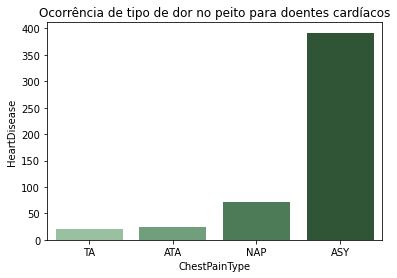

In [120]:
palette = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.7, reverse=False)

# gráfico de barra personalizado
p = sns.barplot(x = 'ChestPainType', y = 'HeartDisease', data = plt_cpt_hd, palette = palette)

# título do gráfico
p.set_title('Ocorrência de tipo de dor no peito para doentes cardíacos')

Assim sendo, para doentes cardíacos, o tipo de dor no peito mais comum é o ASY. E o tipo de dor no peito menos comum é a TA.

5. Qual o valor médio de colesterol para pessoas que têm uma doença cardíaca? 

In [121]:
chol_hd = df1.loc[:, ['Cholesterol', 'HeartDisease']] # filtrando 2 colunas

In [122]:
chol_hd = chol_hd.query('HeartDisease == 1') # filtrando o valor '1' da coluna 'HeartDisease'
chol_hd

Person,Cholesterol,HeartDisease
1,180.0,1
3,214.0,1
8,207.0,1
11,164.0,1
13,234.0,1
...,...,...
912,241.0,1
913,264.0,1
914,193.0,1
915,131.0,1


In [123]:
chol_hd['Cholesterol'].mean() # média da coluna 'Cholesterol'

235.42427907295846

Pessoas com doenças cardíacas tem a taxa de colesterol médio de 235,42. O que significa que ter um colesterol alto, na maioria dos casos, ocasiona em ter uma doença cardíaca (se considerarmos erroneamente que colesterol alto é o único fator para ter doença cardíaca). 

6. Existe correlação entre a pressão sanguínea em repouso ('RestingBP') e a taxa de colesterol ('Cholesterol')?

In [124]:
# tanto faz usar df1 ou df1_norm
rbp_chol = df1.loc[:, ['RestingBP', 'Cholesterol']] # filtrando duas colunas do data frame
rbp_chol

Person,RestingBP,Cholesterol
0,140.0,289.0
1,160.0,180.0
2,130.0,283.0
3,138.0,214.0
4,150.0,195.0
...,...,...
913,110.0,264.0
914,144.0,193.0
915,130.0,131.0
916,130.0,236.0


In [125]:
corre = rbp_chol.corr() # calculando matriz de correlação
corre

Person,RestingBP,Cholesterol
Person,,
RestingBP,1.000000,0.096524
Cholesterol,0.096524,1.000000


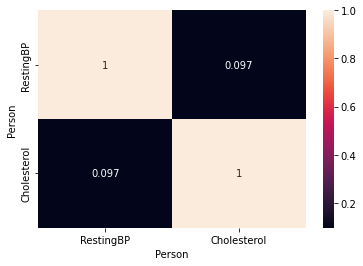

In [126]:
# mapa de calor da matriz de correlação
sns.heatmap(corre, annot = True)

De acordo com a escala de correlação, a correlação entre os dados do data frame de 'RestingBP' e 'Cholesterol' é baixa. 

7. Visão geral de correlação entre todos os dados do data frame (df1_norm).

In [127]:
rs = np.random.RandomState(0) # colocando no estado 0
corr = df1_norm.corr() # calculando correlação de todo o data frame 'df1_norm'
corr.style.background_gradient(cmap='coolwarm') # background de fundo da matriz de correlação

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.263162,0.006465,0.000000,-0.382153,0.258855,0.282039
RestingBP,0.263162,1.000000,0.096438,-0.000000,-0.109703,0.174093,0.118022
Cholesterol,0.006465,0.096438,1.000000,0.000000,0.072451,0.059110,-0.011897
FastingBS,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000
MaxHR,-0.382153,-0.109703,0.072451,0.000000,1.000000,-0.160881,-0.400346
Oldpeak,0.258855,0.174093,0.059110,-0.000000,-0.160881,1.000000,0.404138
HeartDisease,0.282039,0.118022,-0.011897,0.000000,-0.400346,0.404138,1.000000


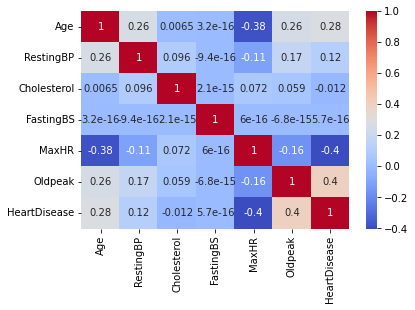

In [128]:
# mapa de calor da matriz de correlação de todo o data frame 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm', annot = True)

Análise de correlações consideráveis:

**1**.   **CORRELAÇÃO APROXIMADAMENTE MÉDIA**

*   HeartDisease com: Oldpeak/MaxHR
*   MaxHR com: Age

**2**.   **CORRELAÇÃO APROXIMADAMENTE FRACA**

*   HeartDisease com: Age/RestingBP
*   Oldpeak com: Age/RestingBP/MaxHR
*   MaxHR com: RestingBP/Oldpeak
*   RestingBP com: Age/HeartDisease/Oldpeak/MaxHR
*   Age com: RestingBP/MaxHR/Oldpeak/HeartDisease










8. Supondo que ter uma frequência cardíaca alta dependa exlusivamente da idade (o que não é verdade, pois estamos tratando de um problema multicausal), ter uma frequência cardíaca máxima alta significa, na maioria dos casos, ter uma idade mais alta ou estar em um grupo social?   

In [129]:
y = df1_norm.loc[:, ['Age', 'MaxHR']] # filtando duas colunas do data frame
y

,Age,MaxHR
0,40,0.789
1,49,0.676
2,37,0.268
3,48,0.338
4,54,0.437
...,...,...
913,45,0.507
914,68,0.570
915,57,0.387
916,57,0.803


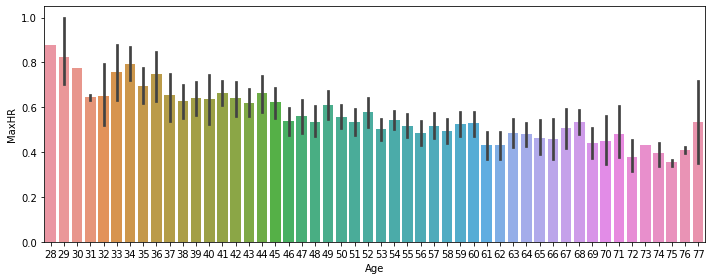

In [130]:
fig, ax = plt.subplots(figsize=(10,4)) # ajustando a largura e comprimento do gráfico

sns.barplot(x = 'Age', y = 'MaxHR', data = y, ax=ax) # gráfico de barra

fig.tight_layout() # ajustando o layout

Logo, considerando a idade como único fator para ter uma frequência cardíaca alta, a idade3 (50 a 60 anos), com 406 ocorrências, é a faixa de idade que tende ter uma frequência cardíaca mais alta. E a que idade5 (maior que 71 anos) é a faixa de idade que tende a ter menos. 

Entretanto, esse resultado para a menor faixa de idade é duvidoso. 

9. Qual faixa de idade (com intevalo de 10 anos) foi a mais entrevistada? 

In [131]:
age_mhr = df1_norm.loc[:, ['Age']] # filtrando uma coluna do data frame 
age_mhr

,Age
0,40
1,49
2,37
3,48
4,54
...,...
913,45
914,68
915,57
916,57


In [132]:
age_mhr['Age'].nsmallest(1) # verificando a menor idade do data frame

208    28
Name: Age, dtype: int64

In [133]:
age_mhr['Age'].nlargest(1) # verificando a maior idade do data frame

447    77
Name: Age, dtype: int64

Faixas etárias:

* idade 1 (20 a 38 anos)
* idade 2 (39 a 49 anos)
* idade 3 (50 a 60 anos)
* idade 4 (61 até 71 anos) 
* idade 5 (maior 71)

In [134]:
# variáveis de contagem para a faixa de idade
idade1 = 0
idade2 = 0
idade3 = 0 
idade4 = 0 
idade5 = 0

# convertendo uma coluna do data frame em lista e 
# salvando essa lista em uma variável
age_mhr = age_mhr['Age'].tolist()

In [135]:
# transformando todos os elementos da lista de 'str' para 'int'
# por meio da função map()
age_mhr = list(map(int, age_mhr))

type(age_mhr[1]) # verificando o tipo int convertido

int

In [136]:
# loop que realiza a contagem de indíviduos por faixa de idade

for i in range(len(age_mhr)):
  # idade 1
  if (age_mhr[i] >= 20 and age_mhr[i] <= 38):
    idade1 = idade1 + 1  

  # idade 2
  elif (age_mhr[i] >= 39 and age_mhr[i] <= 49):
    idade2 = idade2 + 1  

  # idade 3
  elif (age_mhr[i] >= 50 and age_mhr[i] <= 60):
    idade3 = idade3 + 1  

  # idade 4
  elif (age_mhr[i] >= 61 and age_mhr[i] <= 71):
    idade4 = idade4 + 1  

  # idade 5
  elif (age_mhr[i] > 71):
    idade5 = idade5 + 1  


In [137]:
print(idade1, idade2, idade3, idade4, idade5) # verificando o número de indivíduos por faixa de idade

65 226 406 202 19


A faixa de etária (idade3 -> de 50 a 60 anos) foi a mais entrevistada. Para a obtenção de um resultado mais assertivo, quanto maior a quantidade de amostras, maior a precisão em conclusões. Então, faixas etárias com menos amostras podem gerar resultados tendenciosos e pouco assertivos. 